In [1]:
import pandas as pd
pd.set_option('display.max_colwidth',150)


In [2]:
import spacy
           
# Load the English NLP model
nlp = spacy.load("en_core_web_sm")

# Input sentence
sentence = "Dependency parsing is a natural language processing task."

# Process the sentence with SpaCy
doc = nlp(sentence)

# Iterate over the tokens in the sentence and print their dependencies
for token in doc:
    print(f"{token.text}: {token.dep_} -> {token.head.text}")


Dependency: compound -> parsing
parsing: nsubj -> is
is: ROOT -> is
a: det -> task
natural: amod -> language
language: compound -> task
processing: compound -> task
task: attr -> is
.: punct -> is


In [8]:
import spacy
from spacy import displacy

# Load the language model
nlp = spacy.load("en_core_web_sm")

sentence = 'Deemed universities charge huge fees'

# nlp function returns an object with individual token information, 
# linguistic features and relationships
doc = nlp(sentence)

print ("{:<15} | {:<8} | {:<15} | {:<20}".format('Token','Relation','Head', 'Children'))
print ("-" * 70)

for token in doc:
  # Print the token, dependency nature, head and all dependents of the token
  print ("{:<15} | {:<8} | {:<15} | {:<20}"
         .format(str(token.text), str(token.dep_), str(token.head.text), str([child for child in token.children])))
  
  # Use displayCy to visualize the dependency 
  displacy.render(doc, style='dep', jupyter=True, options={'distance': 120})

Token           | Relation | Head            | Children            
----------------------------------------------------------------------
Deemed          | amod     | universities    | []                  


universities    | nsubj    | charge          | [Deemed]            


charge          | ROOT     | charge          | [universities, fees]


huge            | amod     | fees            | []                  


fees            | dobj     | charge          | [huge]              


In [10]:
import spacy

# Load the English NLP model
nlp = spacy.load("en_core_web_sm")

# Input sentence
sentence = "Deemed universities charge huge fees"

# Process the sentence with SpaCy
doc = nlp(sentence)

nouns_before_verb = []

# Print the header
print("{:<15} | {:<8} | {:<15} | {:<20}".format("Token", "Dep. Type", "Head", "Dependents"))

# Iterate through the tokens and print information
for token in doc:
    print("{:<15} | {:<8} | {:<15} | {:<20}"
          .format(str(token.text), str(token.dep_), str(token.head.text), str([child for child in token.children])))

    # Collect nouns before the first verb
    if token.pos_ == 'NOUN' or token.pos_ == 'VERB':
        nouns_before_verb.append((token.text, token.dep_, token.head.text))

    # Stop collecting when the first verb is encountered
    if token.pos_ == 'VERB':
        break

# Print the collected nouns and verbs with their relationships
print("\nNouns and Verbs with Relationships:")
for item in nouns_before_verb:
    print(f"{item[0]} ({item[1]}) -> {item[2]}")


Token           | Dep. Type | Head            | Dependents          
Deemed          | amod     | universities    | []                  
universities    | nsubj    | charge          | [Deemed]            
charge          | ROOT     | charge          | [universities, fees]

Nouns and Verbs with Relationships:
universities (nsubj) -> charge
charge (ROOT) -> charge


In [11]:
import spacy
import pandas as pd

# Load the English NLP model
nlp = spacy.load("en_core_web_sm")

# Function to extract nouns and verbs with their relationships
def extract_nouns_and_verbs(sentence):
    doc = nlp(sentence)
    nouns_before_verb = []

    for token in doc:
        if token.pos_ == 'NOUN' or token.pos_ == 'VERB':
            nouns_before_verb.append((token.text, token.dep_, token.head.text))
        if token.pos_ == 'VERB':
            break

    return nouns_before_verb

# Sample DataFrame
data = {'Sentences': ["Deemed universities charge huge fees.",
                      "SpaCy is a natural language processing library.",
                      "The cat sat on the mat."]}

df = pd.DataFrame(data)

# Apply the function to each row in the 'Sentences' column
df['Nouns_Verbs_Relationships'] = df['Sentences'].apply(extract_nouns_and_verbs)

# Display the DataFrame
df


,Sentences,Nouns_Verbs_Relationships
0,Deemed universities charge huge fees.,"[(universities, nsubj, charge), (charge, ROOT, charge)]"
1,SpaCy is a natural language processing library.,"[(language, compound, library), (processing, compound, library), (library, attr, is)]"
2,The cat sat on the mat.,"[(cat, nsubj, sat), (sat, ROOT, sat)]"


In [14]:
import spacy
import pandas as pd

# Load the English NLP model
nlp = spacy.load("en_core_web_sm")

# Function to extract concept-value pairs
def extract_concept_value_pairs(sentence):
    doc = nlp(sentence)
    concept_value_pairs = []

    for token in doc:
        if token.pos_ == 'NOUN':
            concept = token.text
            values = [child.text for child in token.children if child.pos_ != 'PUNCT']
            if values:
                concept_value_pairs.append((concept, values))

    return concept_value_pairs

# Sample DataFrame
data = {'Sentences': ["Deemed universities charge huge fees.",
                      "SpaCy is a natural language processing library.",
                      "The cat sat on the mat."]}

df = pd.DataFrame(data)

# Apply the function to each row in the 'Sentences' column
df['Concept_Value_Pairs'] = df['Sentences'].apply(extract_concept_value_pairs)

# Display the DataFrame
df


,Sentences,Concept_Value_Pairs
0,Deemed universities charge huge fees.,"[(universities, [Deemed]), (fees, [huge])]"
1,SpaCy is a natural language processing library.,"[(language, [natural]), (library, [a, language, processing])]"
2,The cat sat on the mat.,"[(cat, [The]), (mat, [the])]"


## Install packages 

In [1]:
%pip install vaderSentiment --quiet
%pip install unidecode spacy --quiet
%python3 -m spacy download es_core_news_sm --quiet
%pip install textblob --quiet
%pip install googletrans==4.0.0-rc1 --quiet

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


UsageError: Line magic function `%python3` not found (But cell magic `%%python3` exists, did you mean that instead?).


In [2]:
#Text transformation
from unidecode import unidecode
import unicodedata
from dateutil import parser
from datetime import datetime
import pickle,nltk,re,os, pandas as pd, numpy as np
from pandas import DataFrame, merge, concat
from tqdm import tqdm
tqdm.pandas()

#Tokenize 
#for text pre-processing
import re,string,os,nltk,ssl,spacy
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords','punkt','averaged_perceptron_tagger','wordnet')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.stem.snowball import SpanishStemmer


#for word embedding
import gensim
from gensim.models import Word2Vec

%load_ext autoreload
#%reload_ext autoreload
%autoreload 2

pd.set_option('display.max_colwidth', 150)

## Remove unnecessary words in date and title


In [3]:
#Preprocessing the whole dataframe
class DataProcessor:
    def __init__(self, data):
        self.data = data
        self.stop_words = set(stopwords.words('spanish'))
        self.month_mapping = {
            'enero': '01', 'febrero': '02', 'marzo': '03', 'abril': '04',
            'mayo': '05', 'junio': '06', 'julio': '07', 'agosto': '08',
            'septiembre': '09', 'octubre': '10', 'noviembre': '11', 'diciembre': '12',
            'january': '01', 'february': '02', 'march': '03', 'april': '04',
            'may': '05', 'june': '06', 'july': '07', 'august': '08',
            'september': '09', 'october': '10', 'november': '11', 'december': '12'
            }
        
    #function for time cleaning
    def remove_words(self, text):
        if pd.notnull(text) and isinstance(text, str):  
            words = text.split()
            filtered_words = [word for word in words if word.lower() not in self.stop_words]
            return ' '.join(filtered_words)
        else:
            return text

    # Function to remove extra spaces and keep single space
    def clean_spaces(self, text):
        text = text.lower()
        words = text.split()
        # Remove the first word using list slicing
        words = words[1:]
        words = text.replace(',', '').split()
        # Join the words with a single space between them
        cleaned_text = " ".join(words)
        # Remove commas using regular expression
        cleaned_text = re.sub(r',', '', cleaned_text)
        cleaned_text = unidecode(cleaned_text)
        return cleaned_text

    def custom_parser(self, date_string):
        date_string = ' '.join([word for word in date_string.split() if word.lower() not in self.stop_words])
    
        # Remove stopwords and unwanted characters from the date string
        date_string = re.sub(r'(y quintana roo|y san diego|zurich|winnipeg canadá|y chicago)', '', date_string, flags=re.IGNORECASE)  # Remove 'y quintana roo'
        date_string = re.sub(r'(y moscú|zúrich suiza)', '', date_string, flags=re.IGNORECASE)  # Remove 'y quintana roo'
        date_string = re.sub(r'y quintana roo', '', date_string, flags=re.IGNORECASE)  # Remove 'y quintana roo'
        date_string = re.sub(r'(jueves|lunes|martes|miercoles|viernes|sabado|domingo)', '', date_string, flags=re.IGNORECASE)  # Remove 'jueves'
        date_string = re.sub(r'[|].*$', '', date_string)  # Remove '| 19:27 pm hrs'
        
        # Remove any word before the digits (e.g., 'septiembre 11 2019' from 'septiembre 11 2019 | 19:27 pm hrs')
        date_string = re.sub(r'^[a-zA-Z]+\s+(\d{1,2})\s+(\d{4})$', r'\1-\2', date_string)
        
        # Remove any word before the digits (e.g., 'septiembre 11 2019' becomes '11 septiembre 2019')
        date_string = re.sub(r'^\D*(\d{1,2})\s+(\w+)\s+(\d{4})$', r'\1 \2 \3', date_string)
        date_string = ' '.join([word for word in date_string.split() if word.lower() not in self.stop_words])
        
        # Remove any word before the digits (e.g., 'viena 12.03.2021' becomes '12.03.2021')
        date_string = re.sub(r'^\D*(\d{1,2}\.\d{2,2}\.\d{4,4})$', r'\1', date_string)

        # Check if the date is in the format 'month day year' (e.g., 'june 25 2010')
        try:
            parsed_date = datetime.strptime(date_string, '%B %d %Y')
            return parsed_date.strftime('%d-%m-%Y')
        except ValueError:
            pass
            
        # Check if the date matches the format 'Month day, year at time am/pm timezone'
        try:
            formatted_date = datetime.strptime(date_string, '%B %d, %Y at %I:%M %p %Z')
            return formatted_date
        except ValueError:
            pass

        # Check if the date contains day, month, year, and time (e.g., 'february 27 2017 at 5:00 am est')
        if re.match(r'[a-zA-Z]+\s+\d{1,2}\s+\d{4}\s+at\s+\d{1,2}:\d{2}\s+(am|pm)', date_string):
            parts = re.findall(r'\d+|[a-zA-Z]+|am|pm', date_string.lower())
            month = self.month_mapping.get(parts[0].lower(), '01')
            day = parts[1].zfill(2)
            year = parts[2]
            hour = parts[4] if parts[4] != '12' else '00'
            minute = parts[5]
            meridian = parts[6]
            
            # Convert 12-hour time to 24-hour format
            if meridian == 'pm':
                hour = str(int(hour) + 12).zfill(2)
            
            try:
                return parser.parse(f'{day}-{month}-{year} {hour}:{minute}', dayfirst=True)
            except (TypeError, ValueError):
                return pd.NaT
        
        # Check if the date contains day, month, and year (e.g., 'june 22 2010')
        elif re.match(r'[a-zA-Z]+\s+\d{1,2}\s+\d{4}', date_string):
            parts = re.findall(r'\d+|[a-zA-Z]+', date_string)
            month = self.month_mapping.get(parts[0].lower(), '01')
            day = parts[1].zfill(2)
            year = parts[2]
            try:
                return parser.parse(f'{day}-{month}-{year}', dayfirst=True)
            except (TypeError, ValueError):
                return pd.NaT
            
        # Check if the date is in the format 'september 22 2023'
        elif re.match(r'[a-zA-Z]+\s+\d{1,2}\s+\d{4}', date_string):
            parts = re.findall(r'\d+|[a-zA-Z]+', date_string)
            month = self.month_mapping.get(parts[0].lower(), '01')
            day = parts[1].zfill(2)
            year = parts[2]
            try:
                return parser.parse(f'{day}-{month}-{year}', dayfirst=True)
            except (TypeError, ValueError):
                return pd.NaT
            
        # Check if the date contains day, month, and year (e.g., 'septiembre 11 2019')
        elif re.match(r'[a-zA-Z]+\s+\d{1,2}\s+\d{4}', date_string):
            parts = re.findall(r'\d+|[a-zA-Z]+', date_string)
            month = self.month_mapping.get(parts[0].lower(), '01')
            day = parts[1].zfill(2)
            year = parts[2]
            try:
                return parser.parse(f'{day}-{month}-{year}', dayfirst=True)
            except (TypeError, ValueError):
                return pd.NaT
            
        # Check if the date contains day, month, and year in the format '03.11.2019'
        elif re.match(r'\d{2}.\d{2}.\d{4}', date_string):
            parts = re.findall(r'\d+', date_string)
            day = parts[0].zfill(2)
            month = parts[1].zfill(2)
            year = parts[2]
            try:
                return parser.parse(f'{day}-{month}-{year}', dayfirst=True)
            except (TypeError, ValueError):
                return pd.NaT
        
        # Check if the date contains day and month (e.g., '11 septiembre 2019')
        elif re.match(r'\d{1,2}\s+[a-zA-Z]+\s+\d{4}', date_string):
            parts = re.findall(r'\d+|[a-zA-Z]+', date_string)
            day = parts[0].zfill(2)
            month = self.month_mapping.get(parts[1].lower(), '01')
            year = parts[2]
            try:
                return parser.parse(f'{day}-{month}-{year}', dayfirst=True)
            except (TypeError, ValueError):
                return pd.NaT
            
        elif re.match(r'[a-zA-Z]+\s+\d{1,2},\s+\d{4}\s+at\s+\d{1,2}:\d{2}\s+[apm]+\s+[a-zA-Z]+', date_string):
            parts = re.findall(r'[a-zA-Z]+|\d+', date_string)
            month = self.month_mapping.get(parts[0].lower(), '01')
            day = parts[1].zfill(2)
            year = parts[2]
            hour = parts[4].zfill(2)
            minute = parts[5]
            am_pm = parts[6].lower()
            if am_pm == 'pm':
                hour = str(int(hour) + 12)  # convert to 24-hour format
            try:
                return parser.parse(f'{day}-{month}-{year} {hour}:{minute}', dayfirst=True)
            except (TypeError, ValueError):
                return pd.NaT

        # Check if the date contains month and year (e.g., 'septiembre 2023')
        elif re.match(r'[a-zA-Z]+\s+\d{4}', date_string):
            parts = re.findall(r'\d+|[a-zA-Z]+', date_string)
            month = self.month_mapping.get(parts[0].lower(), '01')
            year = parts[1]
            try:
                return parser.parse(f'01-{month}-{year}', dayfirst=True)
            except (TypeError, ValueError):
                return pd.NaT

        # Check if the date is in the format '30072020'
        elif re.match(r'\d{8}', date_string):
            day = date_string[0:2]
            month = date_string[2:4]
            year = date_string[4:8]
            try:
                return parser.parse(f'{day}-{month}-{year}', dayfirst=True)
            except (TypeError, ValueError):
                return pd.NaT

        # Check if the date contains month name, day, year, and time (e.g., 'february 27, 2017 at 5:00 am est')
        elif re.match(r'[a-zA-Z]+\s+\d{1,2},\s+\d{4}\s+at\s+\d{1,2}:\d{2}\s+[apm]+\s+[a-zA-Z]+', date_string):
            try:
                return parser.parse(date_string, dayfirst=False)
            except (TypeError, ValueError):
                return pd.NaT


        # Check if the date contains day, month, and year (e.g., '04 octubre 2023 fecha publicación')
        elif re.match(r'\d{1,2}\s+[a-zA-Z]+\s+\d{4}\s+fecha\s+publicación', date_string):
            parts = re.findall(r'\d+|[a-zA-Z]+', date_string)
            day = parts[0].zfill(2)
            month = self.month_mapping.get(parts[1].lower(), '01')
            year = parts[2]
            try:
                return parser.parse(f'{day}-{month}-{year}', dayfirst=True)
            except (TypeError, ValueError):
                return pd.NaT

        # Check if the date contains day, month abbreviation, and year (e.g., '30 ene. 2017')
        elif re.match(r'\d{1,2}\s+[a-zA-Z]+\.\s+\d{4}', date_string):
            parts = re.findall(r'\d+|[a-zA-Z]+', date_string)
            day = parts[0].zfill(2)
            month = self.month_mapping.get(parts[1].lower(), '01')
            year = parts[2]
            try:
                return parser.parse(f'{day}-{month}-{year}', dayfirst=True)
            except (TypeError, ValueError):
                return pd.NaT

        # Check if the date contains day, month, year, and a specific phrase (e.g., '04 octubre 2023 fecha publicación')
        elif re.match(r'\d{1,2}\s+[a-zA-Z]+\s+\d{4}\s+[a-zA-Z\s]+', date_string):
            parts = re.findall(r'\d+|[a-zA-Z]+', date_string)
            day = parts[0].zfill(2)
            month = self.month_mapping.get(parts[1].lower(), '01')
            year = parts[2]
            try:
                return parser.parse(f'{day}-{month}-{year}', dayfirst=True)
            except (TypeError, ValueError):
                return pd.NaT
            
        # Check if the date contains month and year (e.g., 'septiembre 2019')
        elif re.match(r'[a-zA-Z]+\s+\d{4}', date_string):
            parts = re.findall(r'\d+|[a-zA-Z]+', date_string)
            month = self.month_mapping.get(parts[0].lower(), '01')
            year = parts[1]
            try:
                return parser.parse(f'01-{month}-{year}', dayfirst=True)
            except (TypeError, ValueError):
                return pd.NaT
        
        # Check if the date contains day, month, year, and a specific phrase (e.g., 'miercoles 11 octubre 2017 - 14:07:')
        elif re.match(r'[a-zA-Z]+\s+\d{1,2}\s+[a-zA-Z]+\s+\d{4}\s+-\s+\d{2}:\d{2}:', date_string):
            parts = re.findall(r'\d+|[a-zA-Z]+', date_string)
            day = parts[1].zfill(2)
            month = self.month_mapping.get(parts[2].lower(), '01')
            year = parts[3]
            time = re.search(r'(\d{2}:\d{2})', date_string).group(1)
            try:
                return parser.parse(f'{day}-{month}-{year} {time}', dayfirst=True)
            except (TypeError, ValueError):
                return pd.NaT

        # Check if the date contains day, month, year, and time in the format 'miercoles 11 octubre 2017 - 14:07:'
        elif re.match(r'^[a-zA-Z]+\s+\d{1,2}\s+[a-zA-Z]+\s+\d{4}\s+-\s+\d{2}:\d{2}:', date_string):
            parts = re.findall(r'\d+|[a-zA-Z]+', date_string)
            day = parts[1].zfill(2)
            month = self.month_mapping.get(parts[2].lower(), '01')
            year = parts[3]
            time = re.search(r'(\d{2}:\d{2})', date_string).group(1)
            try:
                return parser.parse(f'{day}-{month}-{year} {time}', dayfirst=True)
            except (TypeError, ValueError):
                return pd.NaT
       
        # Check if the date is in the format 'edición 05102023'
        elif re.match(r'edición\s+(\d{2})(\d{2})(\d{4})', date_string):
            match = re.match(r'edición\s+(\d{2})(\d{2})(\d{4})', date_string)
            day = match.group(1).zfill(2)
            month = match.group(2).zfill(2)
            year = match.group(3)
            try:
                return parser.parse(f'{day}-{month}-{year}', dayfirst=True)
            except (TypeError, ValueError):
                return pd.NaT

        # Handle other date formats using the initial logic
        else:
            # Remove '- 00:06' pattern
            date_string = re.sub(r'-\s\d{2}:\d{2}$', '', date_string)
            date_string = re.sub(r'\s\d{2}:\d{2}$', '', date_string)
            try:
                return parser.parse(date_string, dayfirst=True)
            except (TypeError, ValueError):
                return pd.NaT

    def extract_word_between_slashes(self, url):
        pattern = r"/([^/]+)/"
        matches = re.findall(pattern, url)
        if matches:
            return matches
        else:
            return None

    def extract_word_after_com_mx(self, url):
        pattern = r"\.com\.mx/([^/]+)/"
        match = re.search(pattern, url)
        if match:
            return match.group(1)
        else:
            return None

    def extract_digits_between_hyphens(self, url):
        pattern = r"-(\d+)-"
        match = re.search(pattern, url)
        if match:
            return match.group(1)
        else:
            return None

    def parse_date(self, date_string):
        formats = [
            '%A %d de %B de %Y - %H:%M',
            '- %d %b, %Y',
            '/ %d.%m.%Y %H:%M:%S',
            '| %d-%m-%Y'
        ]
        for fmt in formats:
            try:
                return pd.to_datetime(date_string, format=fmt).strftime('%Y-%m-%d')
            except ValueError:
                pass
        return None

    def extract_word(self, url):
        pattern = r"//(.*?)\.com"
        match = re.search(pattern, url)
        if match:
            return match.group(1)
        else:
            return None


    def remove_accents(self, text):
        if isinstance(text, str):
            return ''.join(char.lower() for char in unicodedata.normalize('NFD', text) if unicodedata.category(char) != 'Mn')
        return ''  # Return empty string for NaN values

    def remove_stopwords(self, text):
        if pd.notnull(text) and isinstance(text, str):  # Check for NaN values
            words = text.split()
            filtered_words = [word for word in words if word.lower() not in self.stop_words]
            return ' '.join(filtered_words)
        else:
            return text
        
    def process_data(self):
        # Apply transformations to self.data using class methods
        self.data['time'] = self.data['time'].progress_apply(lambda x: self.remove_words(x.lower()))
        # Remove first words and special characters from 'dates' column
        self.data['time'] = (self.data['time']
                    .str.lower()
                    .str.replace(r'^(washington|martes|-|/|\|)\s*', '', regex=True)
                    .str.replace(r'(de)', '', regex=True)
                    .str.replace(r'.*/\s*', '', regex=True)
                    .str.replace(r'\b\d{2}:\d{2}:\d{2}\b', '', regex=True)
                    .str.replace("'", '')
                    .str.strip()
                    )
        self.data['time'] = (self.data['time'].progress_apply(self.clean_spaces))
        self.data['date'] = self.data['time'].progress_apply(self.custom_parser)
        self.data['qter'] = pd.PeriodIndex(self.data.date, freq='M')
        self.data['topics_link'] = self.data['link'].progress_apply(self.extract_word_after_com_mx)
        self.data.loc[pd.isnull(self.data.newspaper),'newspaper'] = self.data[pd.isnull(self.data.newspaper)]['link'].progress_apply(self.extract_word)
        self.data['title']= (self.data['title'].progress_apply(lambda x: self.remove_stopwords(self.remove_accents(x))))
        self.data['content'] = self.data['content'].progress_apply(lambda x: self.remove_stopwords(self.remove_accents(x)))

# Preprocessing 


## Read data

In [4]:
class TextPreprocessor:
    def __init__(self):
        self.nlp = spacy.load("es_core_news_sm")
        self.spanish_stemmer = SnowballStemmer("spanish")
        
    @staticmethod
    def remove_brackets(lst):
        if pd.notnull(lst) and isinstance(lst, str):  
            return ', '.join(map(str, lst))
    
    @staticmethod
    def preprocess(text):
        if isinstance(text, str):  
            text = text.lower()
            text = re.sub(r'\[[0-9]*\]',' ',text)
            text = re.sub(r'\d',' ',text)
            text = re.sub('\s+', ' ', text) #remove all whitespace
            text = re.sub(r'\s+',' ',text) #remove all whitespace including backslash
            text = re.sub(r'[^\w\s.]', ' ', str(text)) #remove all non-alphanumeric and non-whitespace characters from a given text string.
            text = re.sub('[%s]' % re.escape(''.join(c for c in string.punctuation if c != '.')), ' ', text)
            #text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
            text = re.compile('<.*?>').sub('', text) #Remove HTML tags
            text = unidecode(text)
            text = text.strip()
            text = re.sub('\s+', ' ', text) #remove all whitespace
            text = re.sub(r'\s+',' ',text) #remove all whitespace including backslash
        return text
    
    def lemmatizer(self, string):
        if isinstance(string, str): 
            doc = self.nlp(string)
            lemmatized_words = [token.lemma_ for token in doc]
            return " ".join(lemmatized_words)
        
    def stopword(self, text):
        if isinstance(text, str): 
            words = text.split()
            filtered_words = [word for word in words if word not in stopwords.words(['english', 'spanish'])]
            return ' '.join(filtered_words)
        elif isinstance(text, pd.Series):
            return text.apply(self.stopword)  # Apply stopword method to each element in the Series
        else:
            return text
    
    #Before
    #def tokenizer(self, string):
    #    if isinstance(string, str):  
    #        word_pos_tags = nltk.pos_tag(word_tokenize(string))
    #        a = [self.lemmatizer(tag[0], self.get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)]
    #        return " ".join(a)
    
    #def tokenizer(self, string):
    #    if isinstance(string, str):  
    #        doc = self.nlp(string)
    #        lemmatized_words = [token.lemma_ for token in doc]
    #        return " ".join(lemmatized_words)
        
    def get_wordnet_pos(self, tag):
        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('N'):
            return wordnet.NOUN
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN
    
    def finalpreprocess(self, texts):
        processed_texts = []
        for text in tqdm(texts, desc="Processing texts", ncols=100):
            processed_text = self.preprocess(self.stopword(text))
            processed_texts.append(processed_text)
        return processed_texts

In [10]:
#Read data and preprocess title column
df = pd.DataFrame(pd.read_pickle('final_data.pkl'))[['title','content','time','newspaper','link']].drop_duplicates()
# Apply sentence tokenization to the 'text' column and keep only the first 3 sentences
df['content'] = df['content'].apply(lambda x: ' '.join(nltk.sent_tokenize(x)[:3]))


In [21]:
df[df['time'].str.contains(('24 de octubre | 24 de Octubre'))]

,title,content,time,newspaper,link
0,Inflación en México: los 10 productos con alzas y bajas de precio más pronunciadas en la 1Q de octubre,El transporte aéreo y los servicios turísticos en paquete están entre los productos que más encarecieron en la primera mitad de octubre. El jitoma...,Martes 24 de Octubre de 2023 - 10:45,eleconomista,https://www.eleconomista.com.mx/economia/Inflacion-en-Mexico-los-10-productos-con-alzas-y-bajas-de-precio-mas-pronunciadas-en-la-1Q-de-octubre-202...
1,La geopolítica es ahora el mayor riesgo para la economía global: Banco Mundial,"Las tensiones geopolíticas agravadas por el conflicto de Oriente Medio constituyen la mayor amenaza para la economía mundial, señaló el presidente...",Martes 24 de Octubre de 2023 - 08:00,eleconomista,https://www.eleconomista.com.mx/economia/La-geopolitica-es-ahora-el-mayor-riesgo-para-la-economia-global-Banco-Mundial-20231024-0030.html
2,Inflación frena a 4.27% en la primera quincena de octubre y se acerca a la meta,Por Ana Karen García y Belén Saldívar En la primera quincena de octubre la tasa de inflación nacional registró su nivel más bajo (4.27%) en poco m...,Martes 24 de Octubre de 2023 - 06:45,eleconomista,https://www.eleconomista.com.mx/economia/Inflacion-se-ubica-en-4.27-en-la-primera-quincena-de-octubre-y-se-acerca-a-la-meta-20231024-0022.html
3,Celebra López Obrador que inflación siga disminuyendo,"Ciudad de México. Ante el nuevo reporte a la baja de la inflación en el país, el presidente Andrés Manuel López Obrador celebró que ese indicador ...",24 de octubre de 2023 09:51,jornada,https://www.jornada.com.mx/noticia/2023/10/24/economia/celebra-lopez-obrador-que-inflacion-siga-disminuyendo-5376
4,Perdió la CFE mil 567 mdp en el tercer trimestre,"Ciudad de México. En el tercer trimestre del año, la Comisión Federal de Electricidad (CFE) reportó pérdidas por mil 567 millones 658 mil pesos, q...",24 de octubre de 2023 09:24,jornada,https://www.jornada.com.mx/noticia/2023/10/24/economia/perdio-la-cfe-mil-567-mdp-en-el-tercer-trimestre-5255
5,Peso cotiza a 18.16 por dólar tras reporte de inflación,"Ciudad de México. Con el aumento del precio del Bitcoin arriba de 10 por ciento como escenografía en el arranque de la jornada de este martes, los...",24 de octubre de 2023 08:21,jornada,https://www.jornada.com.mx/noticia/2023/10/24/economia/peso-cotiza-a-18-16-por-dolar-tras-reporte-de-inflacion-3129
6,Inflación hila 11 quincenas a la baja: 4.27% en primera mitad de octubre,"Ciudad de México. La inflación general anual en México fue de 4.27 por ciento en la primera mitad de octubre, hilando 11 quincenas de desaceleraci...",24 de octubre de 2023 07:16,jornada,https://www.jornada.com.mx/noticia/2023/10/24/economia/inflacion-hila-11-quincenas-a-la-baja-4-27-en-primera-mitad-de-octubre-4759
13394,China advierte que antepondrá su seguridad alimentaria y energética a sus planes de reducción de emisiones de carbono,"China esbozó medidas para lograr sus objetivos de alcanzar el pico de emisiones de carbono en 2030 y la neutralidad antes de 2060, pero dijo que e...",Domingo 24 de Octubre de 2021 - 18:11,eleconomista,https://www.eleconomista.com.mx/economia/China-advierte-que-antepondra-su-seguridad-alimentaria-y-energetica-a-sus-planes-de-reduccion-de-emisione...
15797,Economía mexicana hiló dos meses de contracciones en agosto,"La actividad económica en México hiló en agosto dos meses consecutivos de contracciones anuales, de acuerdo con lo divulgado por el Inegi. La acti...",Jueves 24 de Octubre de 2019 - 11:55,eleconomista,https://www.eleconomista.com.mx/economia/Economia-mexicana-hilo-dos-meses-de-contracciones-en-agosto-20191024-0014.html
15798,Inflación se mantiene en su objetivo de 3% en la primera quincena de octubre,El nivel de inflación a escala nacional ligó cuatro meses y medio dentro del objetivo establecido por el Banco de México (3% +/- un punto porcentu...,Jueves 24 de Octubre de 2019 - 11:45,eleconomista,https://www.eleconomista.com.mx/economia/Inflacion-se-

In [5]:


DataProcessor(df).process_data() ##Preprocessing the whole dataframe
print("--------------------------------------------------------------------")
print(f"Total de registros: {len(df):,}")
print("--------------------------------------------------------------------")
df['title'] = TextPreprocessor().finalpreprocess(df['title'])

100%|██████████| 7249/7249 [00:00<00:00, 849643.98it/s]
0it [00:00, ?it/s]
100%|██████████| 7249/7249 [00:00<00:00, 7988.16it/s]


--------------------------------------------------------------------
Total de registros: 7,249
--------------------------------------------------------------------


Processing texts: 100%|████████████████████████████████████████| 7249/7249 [00:07<00:00, 922.68it/s]


In [6]:
# Function to remove everything after the email address and the sentence 'recibe newsletter'
def process_content(data):
    def remove_text_after_email(row):
        email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
        newsletter_pattern = r'\brecibe newsletter\b'
        email_match = re.search(email_pattern, row)
        newsletter_match = re.search(newsletter_pattern, row, flags=re.IGNORECASE)
        
        if email_match and newsletter_match:
            # If both email and 'recibe newsletter' are present, remove everything after the email and the sentence
            email_index = email_match.start()
            newsletter_index = newsletter_match.start()
            if email_index < newsletter_index:
                return row[:email_index].strip()
            else:
                return row[:newsletter_index].strip()
        elif email_match:
            # If only email is present, remove everything after the email
            return row[:email_match.start()].strip()
        elif newsletter_match:
            # If only 'recibe newsletter' is present, remove everything after the sentence
            return row[:newsletter_match.start()].strip()
        
        # If neither email nor 'recibe newsletter' is present, return the row as it is
        return row.strip()

    data['content'] = data['content'].progress_apply(remove_text_after_email)
    data['title'] = data['title'].progress_apply(remove_text_after_email)
    data['content'] = data['content'].progress_apply(lambda x: sent_tokenize(x))
    data = data.explode('content', ignore_index=True)
    data['word_count'] = data['content'].progress_apply(lambda x: len(word_tokenize(str(x))))
    data = (data[data.word_count > 9].sort_values('date'))
    print("--------------------------------------------------------------------")
    data['content'] = TextPreprocessor().finalpreprocess(data['content'])
    return data

#apply funcion
df = process_content(df)

100%|██████████| 21166/21166 [00:02<00:00, 8312.41it/s]


--------------------------------------------------------------------


Processing texts: 100%|██████████████████████████████████████| 17556/17556 [01:02<00:00, 278.88it/s]


In [7]:
df

,title,content,time,newspaper,link,date,qter,topics_link,word_count
21159,captacion financiera foranea mexico bajara mitad,interior capital monitoring report consignan junio julio efectuaron salidas capital millones dolares.,lunes 09 octubre 2017 - 01:30,eleconomista,https://www.eleconomista.com.mx/economia/Captacion-financiera-foranea-a-Mexico-bajara-a-la-mitad-20171008-0063.html,2017-10-09,2017-10,economia,15
21158,captacion financiera foranea mexico bajara mitad,instituto finanzas internacionales iif anticipa mercado mexicano captara ano mitad inversiones extranjeras logro atraer . acuerdo estimaciones ing...,lunes 09 octubre 2017 - 01:30,eleconomista,https://www.eleconomista.com.mx/economia/Captacion-financiera-foranea-a-Mexico-bajara-a-la-mitad-20171008-0063.html,2017-10-09,2017-10,economia,33
21162,desigualdad inevitable sistema economico mercado fmi,informe semestral monitor fiscal divulgado horas inicien reuniones organismo banco mundial destacan que economias desarrollo redistribucion fiscal...,miercoles 11 octubre 2017 - 14:07,eleconomista,https://www.eleconomista.com.mx/economia/Desigualdad-inevitable-en-un-sistema-economico-de-mercado-FMI-20171011-0043.html,2017-10-11,2017-10,economia,35
21161,desigualdad inevitable sistema economico mercado fmi,matiza excesiva puede erosionar cohesion social conducir polarizacion politica ultima instancia reducir crecimiento economico.,miercoles 11 octubre 2017 - 14:07,eleconomista,https://www.eleconomista.com.mx/economia/Desigualdad-inevitable-en-un-sistema-economico-de-mercado-FMI-20171011-0043.html,2017-10-11,2017-10,economia,17
21160,desigualdad inevitable sistema economico mercado fmi,yolanda morales luis miguel gonzalez washington. reconoce fondo monetario internacional fmi que sistema economico mercado desigualdad inevitable.,miercoles 11 octubre 2017 - 14:07,eleconomista,https://www.eleconomista.com.mx/economia/Desigualdad-inevitable-en-un-sistema-economico-de-mercado-FMI-20171011-0043.html,2017-10-11,2017-10,economia,22
...,...,...,...,...,...,...,...,...,...
1125,alertan migracion menores acompanados quintana roo,secretaria ejecutiva sistema proteccion ninas ninos adolescentes sipinna quinta roo alerto fenomeno migracion llegada menores edad compania adulto...,2023-09-12 10:14,jornada,https://www.jornada.com.mx/notas/2023/09/12/estados/alertan-sobre-migracion-de-menores-no-acompanados-en-quintana-roo/,2023-12-09,2023-12,notas,40
1126,alertan migracion menores acompanados quintana roo,funcionaria senalo periodo enero julio detecto cuatro cada infantes llegan entidad compania adulto aumenta vulnerabilidad posibles delitos.,2023-09-12 10:14,jornada,https://www.jornada.com.mx/notas/2023/09/12/estados/alertan-sobre-migracion-de-menores-no-acompanados-en-quintana-roo/,2023-12-09,2023-12,notas,22
1127,oleada record migrantes frontera sur mexico,alrededor mil extranjeros solicitado asilo enero agosto segun cifras comar mas mitad hicieron tapachula chiapas imagen .,2023-09-12 07:35,jornada,https://www.jornada.com.mx/notas/2023/09/12/estados/oleada-record-de-migrantes-en-la-frontera-sur-de-mexico/,2023-12-09,2023-12,notas,23
1112,crudo mexicano coloca . dolares barril referencia eu baja,mercado petroleo agradecio tregua concedio ayer cotizacion dolar divisa monopoliza transacciones materias primas.,2023-09-12 06:00,jornada,https://www.jornada.com.mx/notas/2023/09/12/economia/crudo-mexicano-se-coloca-a-83-86-dolares-el-barril-la-referencia-de-eu-baja/,2023-12-09,2023-12,notas,15


----
# Descripción de las variables para explicar el ``crecimiento económico``
1. Producción ($P_t$)
2. Oferta ($O_t$)
3. Exportación ($X_t$)
4. Consumo ($C_t$)
5. Demanda ($D_T$)
6. Importación ($N_t$)
7. Inversión ($I_t$)
8. Capital ($K_t$)
9. Interés ($Ti_t$)
10. Tasa cambio ($Tc_t$)
11. Moneda ($M_1$ & $M_2$)
12. Inflación ($Inf_t$)
13. Tecnología ($TIC_t$)
14. Salud ($Corona_t$)
15. Politica ($Polt$)

$$GDP_t = P_t + C_t + I_t + Ti_t + Tx_t + Inf_t+ N_t + X_t + \epsilon_t$$


## Definition of main concepts:
 

| Concepts      | Definition |
| :----------- | :----------- |
| ``Economic Status:``      | A sentence pertaining to the state of the economy, relating to ``unemployment`` and `inflation`|
| ``Dollar Value Change:``   | A sentence pertaining to changes such as appreciation or depreciation of value of the United States Dollar on the ``Foreign Exchange Market``|
|``Energy/House Prices:`` | A sentence pertaining to changes in prices of real estate, energy commodities, or energy sector as a whole.
| ``Foreign Nations:`` | A sentence pertaining to trade relations between the United States and a foreign country. If not discussing United States we label neutral.
| ``Fed Expectations/Actions/Assets:`` | A sentence that discusses changes in the Fed yields, bond value, reserves, or any other financial asset value.
| ``Money Supply:`` | A sentence that overtly discusses impact to the money supply or changes in demand.
| ``Labor:`` | A sentence that relates to changes in labor productivity

### Example of the phrases to track

| Category                        | Dovish                                                                                                                                                               | Hawkish                                                                                                                                              |
|---------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------|
| Economic status                 | when inflation decreases, when unemployment increases, when economic growth is project low                                                                           | when inflation increases, when unemployment decreases                                                                                                |
| Dollar value change             | when dollar appreciates                                                                                                                                              | when dollar depreciates                                                                                                                              |
| Energy/House prices             | when oil/energy prices decrease                                                                                                                                      | when oil/energy prices increase                                                                                                                      |
| Foreign nations                 | when the US trade deficit decreases                                                                                                                                  | when the US trade deficit increases                                                                                                                  |
| Fed Expectations/Actions/Assets | Fed expects subpar inflation, Fed expecting disinflation, narrowing spreads of treasury bonds, decreases in treasury security yields, and reduction of bank reserves | Fed expects high inflation, widening spreads of treasury bonds, increase in treasury security yields, increase in TIPS value, increase bank reserves |
| six                             | money supply is low, M2 increases, increased demand for loans                                                                                                        | money supply is high, increased demand for goods, low demand for loans                                                                               |


In [34]:
{
  'economia':list(set(['industria', 'manufacturera', 'produccion','bienes servicios', 
                            'servicio', 'textile', 'maiz','agricultura','oferta',
                            'obras','ingresos','igae', 'consumo bienes','consumo servicios', 
                            'bienes publicos','produccion nacional','ventas','compras',
                            'consumo','demanda','consumidores']))
}

{'economia': ['demanda',
  'bienes publicos',
  'ventas',
  'produccion nacional',
  'bienes servicios',
  'maiz',
  'consumo bienes',
  'industria',
  'obras',
  'consumo',
  'textile',
  'igae',
  'compras',
  'consumidores',
  'consumo servicios',
  'manufacturera',
  'servicio',
  'oferta',
  'ingresos',
  'produccion',
  'agricultura']}

In [68]:
# Dictionary of features to check for in the sentences
features = {
    'produccion': list(set(['industria', 'manufacturera', 'produccion','bienes servicios', 
                            'servicio', 'textile', 'maiz','agricultura','oferta',
                            'obras','ingresos','igae', 'consumo bienes','consumo servicios', 
                            'bienes publicos','produccion nacional'])),
    'consumo': list(set(['ventas','compras','consumo','demanda','consumidores'])),
    'inversion': list(set(['inversion','atracción','ied','inversion directa','inversion extranjera','capital',
                           'inversiones'])),
    'tecnologia': list(set(['tecnologia','comunicacion','internet','telefono', 
                            'inteligencia artificial'])),
    'inflacion': list(set(['inflacion','precios','precio','ipc','canasta basica','canasta','inpc',
                           'presiones inflacionarias'])),
    'importacion': list(set(['importacion','importaciones'])),
    'cambio': list(set(['tasa cambio', 'peso','dolar','divisa','moneda'])),
    'financiero': list(set(['activo','financiero', 'financiera', 'valor'])),
    'interes': list(set(['tasa interes','intereses', 'deuda', 'credito','mercado cambiario'])),
    'exportacion': list(set(['exportacion','exportaciones'])),
    'crecimiento': list(set(['pib', 'producto interno bruto','producto','economia','crecimiento economico',
                             'actividad economica','crecimiento'])),
    'salud': list(set(['coronavirus', 'covid-19', 'covid19', 'pandemia', 'crisis sanitaria', 'corona',
                       'epidemia','salud'])),
    'gobierno': list(set(['presupuesto','pef','eleccion','gobierno','impuestos','recaudacion','bonos',
                          'bono','gasto publico','gasto corriente','deficit publico'])),
    'comercio': list(set(['comercio', 't-mec','tmec','comercial','balance','arrancel'])),
    'instituciones': list(set(['fed','fmi','banco mundial', 'bm','parlamento','banco','banxico'])),
    'internacional': list(set(['internacional','paises', 'eu', 'ee uu']))
}

for key, value in features.items():
    features[key] = [unidecode(word) for word in value]

In [69]:
from more_itertools import split_after


def tokenize(texts):
    return [nltk.tokenize.word_tokenize(t) for t in texts]

def key_word_intersection(data):
    summaries = []
    for x in tokenize((data['content']
                       .str.replace('.','', regex=True)
                       .to_numpy())):
        keywords = np.concatenate(
            [np.intersect1d(x, A_i) for A_i in features.values()])

        dot_sep_sentences = np.array(list(
            split_after(x, lambda i: i == ".")), dtype=object)
        summary = []
        for i, s in enumerate(dot_sep_sentences):
            summary.append(
                [
                    dot_sep_sentences[i][j] for j, keyword in enumerate(s) if keyword in keywords
                ])
        summaries.append(
            ', '.join([' '.join(x) for x in summary if x]))

    return summaries

df['features'] = key_word_intersection(df)
df['features_n'] = df['features'].apply(lambda x: ' '.join(keyword for keyword in x.split() if keyword in features))

In [70]:
# filter dictionary
class SentenceFilter:
    def __init__(self, data, features):
        self.data = data
        self.features = features

    def filter_sentences(self, document):
        sentences = document.split('.')
        filtered_sentences = {}
        for feature, keywords in self.features.items():
            for sentence in sentences:
                if any(keyword in sentence.lower() for keyword in keywords):
                    filtered_sentences[feature] = sentence.strip() + '.'
                    break
        return filtered_sentences

    def apply_filter(self):
        filtered_results = self.data['content'].apply(self.filter_sentences)
        filtered_df = filtered_results.progress_apply(lambda x: pd.Series(x, dtype=object))
        merged_df = self.data.merge(filtered_df, left_index=True, right_index=True, how='outer')
        return merged_df


data = SentenceFilter(df, features).apply_filter()

100%|██████████| 17556/17556 [00:02<00:00, 6988.24it/s] 


In [71]:
data['col_na'] = 16 - data[['cambio', 'inversion', 'internacional',
       'crecimiento', 'gobierno', 'instituciones', 'interes', 'produccion',
       'comercio', 'financiero', 'importacion', 'exportacion', 'tecnologia',
       'inflacion', 'consumo', 'salud']].isna().sum(axis = 1)
data = data[data.col_na >0]

positivo1 = """aumento aumentar arriba apreciar aprecio apreciacion 
positivo encarecieron elevada impulsar repuntar repunto repunte incrementar incremento 
incrementaron confianza recuperar recuperacion expander expansion rendir rendimientos
  ascender ascenso elevo acelera acelerar crecer creciendo subieron subir subio 
  alta alza creacion crezca oportunidad ventaja ascender ascienden asciende 
  disparar dispararon subida repunte encarecer mejorar""".split()

negativo1 = """ frenar freno amenazar amenaza desacelerar desaceleracion 
bajar bajo baja debilitar debilitamiento debilidad debil depreciar depreciacion
    caer caen cayeron caida parar parada estancar estancarse estancamiento 
    marginar marginacion empobrecer pobreza descender descendio ralentizar 
    ralentiza ralentiza reducir reducieron reducio perder perdida 
    recortar recorte recortes crisis riesgos desventaja bajada devaluar 
    devaluacion deteriorar deteriora  contraer contrajo disminuyendo
    empeorar""".split()

adverbio = """mas severa ligero suficientes lentitud moderado fuerza fuerte
graves grave motor super"""

A1 = """ mercado cambiario productos inflacion bonos produccion
  dolar peso divisa moneda canasta dinero t-mec pymes inversion ied
  actividad economica igae ingreso impuesto bolsa tecnologia fintech
  crecimiento economico consumo consumidores recuperacion obras
  empleo demanda exportacion refineria ingresos acciones capital
  activos ahorro arrancel recaudacion divisas oferta demanda venta
  compras industria accionistas """.split()

A2 = ['actividad economica','crecimiento economico','deuda publica',
      'inversion directa','produccion nacional','bienes servicios',
      'consumo bienes','consumo servicios', 'bienes publicos',
      'esperanza vida','canasta basica']


B1 = """desempleo deficit precios precio inflacion pandemia covid19 covid-19
coronavirus deuda migracion migrantes importacion gasto recesion
costos sequia guerra huelga indigencia sindicato""".split()

B2 = ['tasa interes','gasto publico','deficit publico','tipo cambio',
      'presiones inflacionarias','gasto corriente', 'paro laboral']

A11 = ['inflacion','preciar','precios','precio','alimentos','petroleo','productos','servicios',
      'ipc','inpc','produccion','consumo','bienes','canasta','ventas','consumidores','costos',
      'costos',"expectativa inflación", "tasa interés", "actividad económica","empleo"]
A22 = ['aumentar','alzar','incrementar','presionar','crecer','alzar','impulsar','provocar',
      'acelerar','sobrecalentar','ariesgar','inflacionarias','afectar','crecimiento','disparar',
      'positivo']
B11 = ['inflacionarias','interes','actividad']
B22 = ['disminucion','disminuir','bajar','bajo','decremento','reducir','reduccion','caer','caida',
      'desacelera','desacelerar','variacion','limitar','negativo']
C = ["habia", "haber", "tener", "no crecia", "no lo hacían", "no lo hacían", 
     "no lo hacían", "no lo hacían", "no lo harían", " no"] 

A1 += A11
B1 += B11
B2 += B22
A2 += A22


longitud de los títulos

## Filter dictionary

## Working with `INFLATION`

In [117]:
## Select columns
selected_columns = ['qter'] + list(data.loc[:, 'cambio':'salud'].columns)

## Subset dataframe - inflation
inflacion = data[['date','inflacion']].loc[data.loc[:, ['date','inflacion']].notna()[ 'inflacion' ]== True]
inflacion

KeyError: 'cambio'

## Dictionario de palabras en español 
Existen algunos lexicon en español que serán usados en este análisis
1. [Sentiment analysis of the spanish financial stability report](https://www.bde.es/f/webbde/SES/Secciones/Publicaciones/PublicacionesSeriadas/DocumentosTrabajo/20/Files/dt2011e.pdf)
2. [Using the Press as A Real-Time Economic Confidence Indicator](https://www.bcentral.cl/en/content/-/detalle/documento-de-trabajo-n-938)

In [101]:
positivo = """absorbidas capaces mitiga resisten abundancia capaz mitigaban resistido bundante cómoda mitigado restablecer
acomodaticia contención mitigar restableciendo acomodaticias desendeudamiento mitigaron restablecimiento
acomodaticio dinamismo normalidad restaurar afiance dinamizador normalizado revalorizaba afianzado disfrutan normalizados 
revalorizaciones afianzamiento eficaces normalizando revalorizado afianzando eficaz normalizándose revalorizaron ágil eficiente 
normalizar revalorizarse alcista eficientes normalizó revalorizó alcistas equilibrada oportunidades revitalización
aliviadas equilibrado optimismo revitalizar aliviado excelente ordenada robusta aliviando excelentes ordenado robustas
aliviar expandió positiva robusto aliviará expansiva positivamente robustos aliviaron favorable positivas saneada
alivio favorablemente positivo saneado amortigua favorables positivos saneados amortiguación favorece progreso 
sanearon amortiguador favorecen progresos satisfactoria amortiguan favorecido propicias 
satisfactoriamente amortiguar favorecieron propicio sólida amortiguarlos fortaleciéndose reaccionado 
sólidas amortiguarse fortalecimiento reactivación solidez apoyada fortaleció reactivándose sólido asentarse 
fortaleza reafirmando solvente recuperando suavizarán atenuación fortalezas recuperación 
solventes atenuados ganancia recuperado sostenibles beneficiándose ganó recuperan suaves beneficiar holgada 
beneficiara holgadamente recuperándose superada beneficiarán holgadas recuperar sustenta beneficiarían holgado 
recuperara tranquilidad beneficiaron holgados recuperaron vigorosamente beneficiarse mejora recuperarse 
vigoroso beneficien mejorada recuperase beneficioso mejorado recuperen benigna mejoran recuperó benignas 
mejorando reequilibrando benigno mejorándose reequilibrar benignos mejorar reforzado
bienestar mejoraron reforzándolo buen mejorase reforzará buenas mejores reforzaron 
buenos mejoría reforzó calma mejorías remontado calmar mejoró renovado umento aumentar arriba apreciar 
aprecio apreciacion positivo encarecieron elevada impulsar repuntar repunto repunte incrementar incremento 
incrementaron confianza recuperar recuperacion expander expansion rendir rendimientos ascender 
ascenso elevo acelera acelerar crecer creciendo subieron subir subio alta alza creacion crezca 
oportunidad ventaja ascender ascienden asciende disparar dispararon subida repunte encarecer mejorar
  """.split()

negativo = """
abrupta complicarían deterioraban frustró peores rémora abruptas contagiadas deteriorada grave pérdida rescatadas
abrupto contagiado deterioradas gravedad perjudica rescatar abruptos contagiaron deteriorado gravemente perjudicadas resentido
abusivo contagie deteriorando graves perjudiciales resentirse acentuaban contagio deteriorándose guerra perjuicios restaron
acentuadas contagió deteriorar impactará persistencia restringiendo acusados contracción deteriorarse inadecuados persistente resurgido
adversa contracciones deteriorase incapaces persistentes resurgimiento adversas contractiva deterioro incapaz persistieron retraimiento
adverso contrae deterioró incertidumbre perturbaciones retrasa adversos contraerse difícil incertidumbres perversos retroceder
afrontan contrajo difíciles incierta pesimismo retrocedieron afrontarían contraproducentes dificulta inciertas pesimista retrocedió
agotamiento contrayendo dificultad incierto pobre retroceso agravada contrayéndose dificultada inciertos precipicio retrocesos
agravado convulso dificultades inconveniente prematura revés agravamiento costosa dificultado indefinición preocupación secuelas
agravando costosas dificultando indeseado preocupaciones sensible agravar costoso dificultándose ineficiencia preocupado serias
agravará costosos dificultar ineficiencias preocupados serio agravarían crisis dificultaría inestabilidad preocupante serios
agravó cruda dificultarían inestable preocupantes severa agudas dañar disfunción inestables presión severas
agudizado dañaría disfunciones insostenible presiona severo agudizamiento daño drástica insuficiencia presionaban sobrecalentamiento
agudizara débil drásticas insuficiente presionada sombras agudizaran débiles drásticos insuficientes presionadas súbita
agudizaron debilidad dudas intervenida presionado sufren agudizó debilidades empeora intervenidas presionados sufrida
agudo debilita empeorado intervenir presionan sufridas agudos debilitada empeoramiento invalidar presionando sufrido
altibajos debilitado empeoramientos inviabilidad presionar sufridos amenaza debilitamiento empeoran inviable presionará 
sufriendo amenazados debilitan empeorando inviables presionaría sufrieran
amenazan debilitar empeorar irregular presionaron sufrieron amenazar debilitó empeoró lamentablemente presiones sufrió
amenazas débilmente endurecido lastrada problemas sufrirán anómala decepcionante endureciéndose lastradas problemática suspensión
arrastrado decepcionantes endurecimiento lastrado problemáticas temor asimétricos decepcionaron endurecimientos lastrar quebrar temores
ataque deficiencias erosión lastre quebró tensión ataques deficiente erosionado lastró quiebra tensiona
atonía deficitaria erosionar lenta quiebras tensionaban atravesando delicada escalada lento ralentice tensionado
atraviesan depresión escándalos mal ralentiza tensionamiento bache deprimidos escasísima mala ralentización tensionando
brusca deprimirían estallar malas ralentizar tensionaron bruscas desaceleración estallido merma ralentizara tensiones
brusco desastres estancada miedo ralentizarse titubeante bruscos desconfianza estrangulamiento negativa ralentizó traumática
colapsados desencadenamiento estrangulamientos negativamente rebaja truncada
colapso desequilibrada evaporarse negativas rebajadas turbulencia complejidades desequilibrio excesivo negativo rebrote turbulencias
complejo desequilibrios excesivos negativos recaída urgencia complica desestabilizadores falta obstáculo recalentamiento virulencia
complicaciones desfavorable fatiga oscilaciones recesión volátil complicada desfavorablemente frágil padece recesivas vulnerabilidad 
complicadas desfavorables frágiles padecían recrudecían vulnerabilidades
complicado destrucción fragilidad pánicos recrudecidos vulnerable complicados destruyendo fragilidades peligro recrudecieron vulnerables
complicando desvaneciendo fragmentación peligros recrudecimiento complicar deteriora frenazo penalizado recrudeció
frenar freno amenazar amenaza desacelerar desaceleracion 
bajar bajo baja debilitar debilitamiento debilidad debil depreciar depreciacion 
caer caen cayeron caida parar parada estancar estancarse estancamiento 
marginar marginacion empobrecer pobreza descender descendio ralentizar 
ralentiza ralentiza reducir reducieron reducio perder perdida recortar recorte recortes crisis riesgos desventaja bajada devaluar 
devaluacion deteriorar deteriora  contraer contrajo disminuyendo empeorar
""".split()

positivo = [unidecode(item) for item in positivo]
negativo = [unidecode(item) for item in negativo]

any(item in positivo for item in negativo)
## Fuente: https://www.bde.es/f/webbde/SES/Secciones/Publicaciones/PublicacionesSeriadas/DocumentosTrabajo/20/Files/dt2011e.pdf

False

In [102]:
A1 = """ produccion  dinero t-mec pymes inversion ied
      igae ingreso impuesto bolsa tecnologia fintech
      crecimiento economia consumo consumidores recuperacion obras
      empleo demanda exportacion refineria ingresos acciones capital
      activos ahorro arrancel recaudacion oferta demanda venta
      compras industria""".split()

A2 = ['actividad economica','crecimiento economico',
      'inversion directa','produccion nacional','bienes servicios',
      'consumo bienes','consumo servicios', 'bienes publicos',
      'esperanza vida','mercado cambiario']

B1 = """desempleo deficit precios precio inflacion canasta productos
      pandemia covid19 covid-19 coronavirus deuda migracion migrantes 
      importacion gasto recesion costos sequia guerra divisas
      huelga indigencia sindicato inflacionarias interes actividad """.split()

B2 = ['tasa interes','gasto publico','deficit publico','tipo cambio',
      'presiones inflacionarias','gasto corriente', 'paro laboral',
      'deuda publica','canasta basica',]

C = ["habia", "haber", "tener", "no crecia", "no lo hacían", "no lo hacían", 
     "no lo hacían", "no lo hacían", "no lo harían", " no"] 


any(item in A2 for item in B1)

False

In [103]:
# Define the rule_model function
def rule_model(s):
    label = 0
    if (any(word in s.lower() for word in A1) and any(word in s.lower() for word in A2)) or \
            (any(word in s.lower() for word in B1) and any(word in s.lower() for word in B2)):
        label = 0
    elif (any(word in s.lower() for word in A1) and any(word in s.lower() for word in B2)) or \
            (any(word in s.lower() for word in B1) and any(word in s.lower() for word in A2)):
        label = 1
    else:
        label = 2
    if label != 2 and (any(word in s.lower() for word in C)):
        return 1 - label  # turn 0 to 1, and 1 to 0
    else:
        return label

In [104]:
data['label'] = data['content'].progress_apply(lambda x: rule_model(x))

data = data[['content','title','date','qter','label']]

100%|██████████| 14329/14329 [00:00<00:00, 24567.81it/s]


In [105]:
inflacion['label'] = inflacion['inflacion'].progress_apply(lambda x: rule_model(x))

100%|██████████| 2868/2868 [00:00<00:00, 30989.60it/s]


In [106]:
data.label.value_counts()

2    13224
0      882
1      223
Name: label, dtype: int64

In [107]:
def calculate_hawkish_dovish_measure(df_meeting_data):
    try:
        print(df_meeting_data)  # Debug: print the dataframe
        count_total_sentences = len(df_meeting_data.index)
        print("Total Sentences:", count_total_sentences)  # Debug: print total sentences
        if count_total_sentences > 0:
            # count hawkish sentences
            count_hawkish_sentences = len(df_meeting_data.loc[df_meeting_data['label'] == 1].index)
            print("Hawkish Sentences:", count_hawkish_sentences)  # Debug: print hawkish sentences

            # count dovish sentences
            count_dovish_sentences = len(df_meeting_data.loc[df_meeting_data['label'] == 0].index)
            print("Dovish Sentences:", count_dovish_sentences)  # Debug: print dovish sentences

            our_measure = (count_hawkish_sentences - count_dovish_sentences) / count_total_sentences
            print("Hawkish-Dovish Measure:", our_measure)  # Debug: print hawkish-dovish measure
        else:
            our_measure = 0
        return our_measure
    except Exception as e:
        print("Error:", e)  # Debug: print the error message
        return np.nan

# Apply the calculate_hawkish_dovish_measure function to the 'result' column and create a new 'hawkish_dovish_measure' column
inflacion['inflacion'].apply(calculate_hawkish_dovish_measure)

la finalidad actualice contribuyente pague impuestos corresponden pague mas salario si actualizaba conforme inflacion tarifas no destinaba mas recursos fisco debia expuso entrevista experta temas fiscales ey.
Error: object of type 'builtin_function_or_method' has no len()
elizabeth albarran hecho actualice tarifa impuesto renta isr respecto inflacion positivo personas fisicas pues permite pagar realmente deben pesar perciban incremento salario aseguro nora morales vicepresidenta comision fiscal confederacion camaras industriales concamin.
Error: object of type 'builtin_function_or_method' has no len()
avance precios obedecio fin periodo bajas tarifas electricas varias ciudades pais luego tradicionalmente disminuyen temporada calor.
Error: object of type 'builtin_function_or_method' has no len()
octubre indice nacional precios consumidor inpc registro incremento.
Error: object of type 'builtin_function_or_method' has no len()
indicador preferido fed medir precios permanecido bajo meta c

21135   NaN
21134   NaN
21102   NaN
21101   NaN
21091   NaN
         ..
2914    NaN
2912    NaN
2904    NaN
1105    NaN
1100    NaN
Name: inflacion, Length: 2868, dtype: float64

In [108]:
import pandas as pd

# Assume df_meeting_data has columns 'date', 'label'

# Define the original function to calculate our_measure
def calculate_hawkish_dovish_measure(df_meeting_data):
    count_total_dates = len(df_meeting_data['date'].unique())
    
    if count_total_dates > 0:
        # count hawkish sentences
        count_hawkish_sentences = len(df_meeting_data.loc[df_meeting_data['label'] == 1])

        # count dovish sentences
        count_dovish_sentences = len(df_meeting_data.loc[df_meeting_data['label'] == 0])

        measure = (count_hawkish_sentences - count_dovish_sentences) / count_total_dates
    else:
        measure = 0
    
    return measure

# Define the function to calculate our_measure by date and add it as a new column
def calculate_hawkish_dovish_measure_by_date(df_meeting_data):
    # Calculate the measure for each group
    grouped_data = df_meeting_data.groupby('date').apply(lambda x: calculate_hawkish_dovish_measure(x)).reset_index()

    # Rename columns for clarity
    grouped_data.columns = ['date', 'our_measure']

    # Merge the original DataFrame with the new DataFrame on 'date' column
    result_df = pd.merge(df_meeting_data, grouped_data, on='date', how='left')
    
    return result_df


In [109]:
# Calculate our_measure by date and add it as a new column in the original DataFrame
inflacion = calculate_hawkish_dovish_measure_by_date(inflacion)

In [110]:
inflacion

,date,inflacion,label,our_measure
0,2017-10-23,la finalidad actualice contribuyente pague impuestos corresponden pague mas salario si actualizaba conforme inflacion tarifas no destinaba mas rec...,2,0.0
1,2017-10-23,elizabeth albarran hecho actualice tarifa impuesto renta isr respecto inflacion positivo personas fisicas pues permite pagar realmente deben pesar...,2,0.0
2,2017-11-09,avance precios obedecio fin periodo bajas tarifas electricas varias ciudades pais luego tradicionalmente disminuyen temporada calor.,2,0.0
3,2017-11-09,octubre indice nacional precios consumidor inpc registro incremento.,2,0.0
4,2017-11-16,indicador preferido fed medir precios permanecido bajo meta cinco anos actualmente encuentra.,2,0.0
...,...,...,...,...
2863,2023-12-06,decision fed el miercoles informe indice precios consumidor ipc mayo el martes son duda eventos mas cruciales semana.,2,0.0
2864,2023-12-06,alzas sorpresivas tasas interes australia canada asi declaraciones agresivas gobernador suizo semana pasada sugerir inflacion mas persistente pens...,2,0.0
2865,2023-12-06,afrontar tres dias clave datos inflacion unidos reunion politica monetaria reserva federal fed banco central europeo bce mercados financieros arra...,2,0.0
2866,2023-12-09,banco sostuvo proyecto presupuesto maneja politica financiamiento responsable transparente que forma general los supuestos macroeconomicos constru...,0,-1.0


In [48]:
data[data.date == '2017-10-09']

,content,title,date,qter,label,our_measure
0,interior capital monitoring report consignan junio julio efectuaron salidas capital millones dolares.,captacion financiera foranea mexico bajara mitad,2017-10-09,2017-10,2,0.0
1,instituto finanzas internacionales iif anticipa mercado mexicano captara ano mitad inversiones extranjeras logro atraer . acuerdo estimaciones ing...,captacion financiera foranea mexico bajara mitad,2017-10-09,2017-10,2,0.0


<AxesSubplot: xlabel='date'>

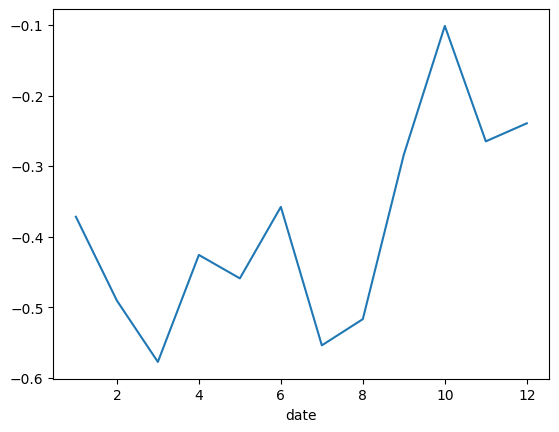

In [111]:
inflacion.groupby(inflacion['date'].dt.month).our_measure.mean().plot()

In [113]:
import chardet
with open('data/Indicadores20231111182822.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
encoding = result['encoding']
inflacion_dt = pd.read_csv('data/Indicadores20231111182822.csv', 
                           encoding=encoding, skiprows=4)

cols = {'Periodos':'qter','583753':'cpi'}
inflacion_dt = inflacion_dt.rename(columns=cols)
#inflacion_dt['qter'] = pd.to_datetime(inflacion_dt['qter']).dt.strftime('%Y-%m')

inflacion['qter'] = inflacion['date'].astype(str)
inflacion = pd.merge(inflacion_dt, inflacion, on='qter')

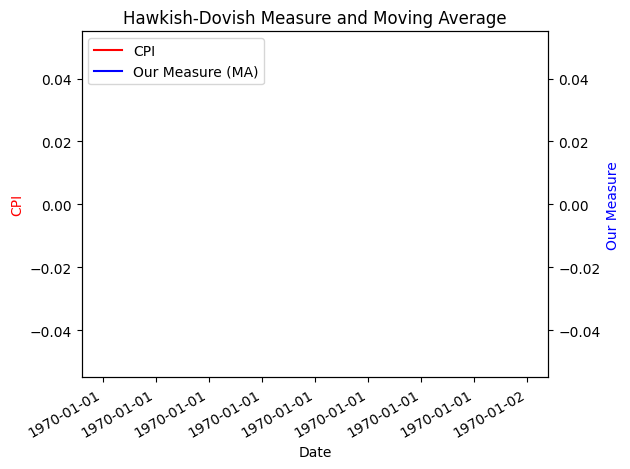

In [114]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming 'qter' is a datetime column
inflacion['qter'] = pd.to_datetime(inflacion['qter'])

# Calculate the 3-day moving average of our_measure
inflacion['Our_measure'] = 1 * inflacion['our_measure'].rolling(window=100).mean()

# Create a figure and two axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Plot our_measure on the primary y-axis in red
ax1.plot(inflacion['qter'], inflacion['cpi'], color='red', label='CPI')  # Update label here

# Plot the moving average on the secondary y-axis in blue
ax2.plot(inflacion['qter'], inflacion['Our_measure'], color='blue', label='Our Measure (MA)')  # Update label here

# Set the labels and title
ax1.set_xlabel('Date')
ax1.set_ylabel('CPI', color='red')
ax2.set_ylabel('Our Measure', color='blue')
plt.title('Hawkish-Dovish Measure and Moving Average')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Use a date formatter for the x-axis
date_format = mdates.DateFormatter('%Y-%m-%d')
ax1.xaxis.set_major_formatter(date_format)

# Autoformat the date labels
fig.autofmt_xdate()

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Tighten the layout
plt.tight_layout()

# Show the plot
plt.show()


In [52]:
data

,qter,cpi,content,title,date,label,our_measure,Our_measure
0,2017-10-01,6.37,interior capital monitoring report consignan junio julio efectuaron salidas capital millones dolares.,captacion financiera foranea mexico bajara mitad,2017-10-09,2,0.0,NaN
1,2017-10-01,6.37,instituto finanzas internacionales iif anticipa mercado mexicano captara ano mitad inversiones extranjeras logro atraer . acuerdo estimaciones ing...,captacion financiera foranea mexico bajara mitad,2017-10-09,2,0.0,NaN
2,2017-10-01,6.37,informe semestral monitor fiscal divulgado horas inicien reuniones organismo banco mundial destacan que economias desarrollo redistribucion fiscal...,desigualdad inevitable sistema economico mercado fmi,2017-10-11,2,-1.0,NaN
3,2017-10-01,6.37,matiza excesiva puede erosionar cohesion social conducir polarizacion politica ultima instancia reducir crecimiento economico.,desigualdad inevitable sistema economico mercado fmi,2017-10-11,0,-1.0,NaN
4,2017-10-01,6.37,yolanda morales luis miguel gonzalez washington. reconoce fondo monetario internacional fmi que sistema economico mercado desigualdad inevitable.,desigualdad inevitable sistema economico mercado fmi,2017-10-11,2,-1.0,NaN
...,...,...,...,...,...,...,...,...
14185,2023-10-01,4.26,aumento precio bitcoin arriba ciento escenografia arranque jornada martes mercados financieros operan mixtos mayor tendencia positiva.,peso cotiza . dolar tras reporte inflacion,2023-10-24,2,0.0,-0.60
14186,2023-10-01,4.26,inflacion general anual mexico . ciento primera mitad octubre hilando quincenas desaceleracion revelo indice nacional precios consumidor inpc .,inflacion hila quincenas baja . primera mitad octubre,2023-10-24,2,0.0,-0.59
14187,2023-10-01,4.26,indice nacional precios consumidor inpc mostro primera mitad octubre variacion quincenal . mientras tasa anual ubico . cerca objetivo banxico punt...,inflacion frena . primera quincena octubre acerca meta,2023-10-24,2,0.0,-0.58
14188,2023-10-01,4.26,jitomate cebolla aguacate estan registraron bajas nivel precios.,inflacion mexico productos alzas bajas precio mas pronunciadas q octubre,2023-10-24,2,0.0,-0.57


In [53]:
# Assuming 'date' and 'cpi' are columns in your DataFrame
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(pd.to_datetime(inflacion_dt['date']), inflacion_dt['cpi'])  # Convert 'date' to datetime

# Formatting x-axis and x-ticks for date
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format date as 'YYYY-MM-DD'
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Automatically choose date ticks

plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
plt.xlabel('Date')  # Set x-axis label

# Automatically adjust subplot parameters to prevent clipping of tick labels
plt.tight_layout()

# Show the plot
plt.show()

KeyError: 'date'

<Figure size 1000x600 with 0 Axes>

<AxesSubplot: >

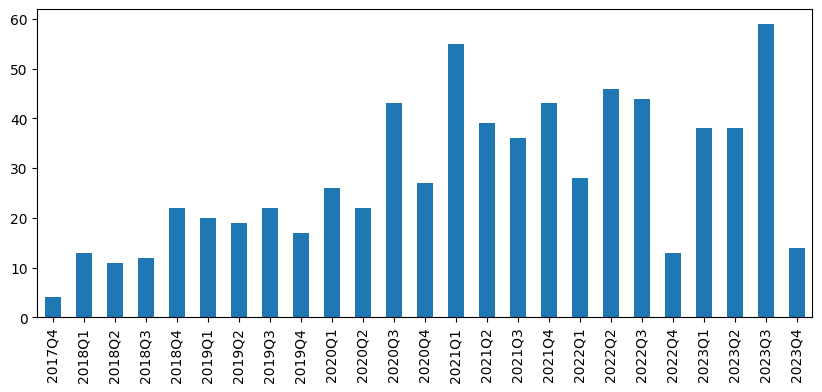

In [ ]:
#pib
data[data.content.str.contains('pib')]['qter'].value_counts().sort_index().plot(kind='bar', figsize=(10,4))

In [ ]:
data = data[~pd.isnull(data.title_pr)]

In [ ]:
specific_rows = [5,42]
pd.read_csv('Tabla.csv', encoding='utf-8',names=['col1', 'col2', 'col3', 'col4'],
            skiprows = lambda x: x in specific_rows)

ParserError: Error tokenizing data. C error: Expected 4 fields in line 5, saw 6


# Describe topics that explain `Economic Growth`

# LDA

In [ ]:
# Tokenize the documents
processed_data = data['title_pr']

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Sample DataFrame with a column named "text"
# df = pd.DataFrame({'text': your_text_data})

# List of topics
topics = {'produccion', 'inversion', 'consumo', 'oferta', 'demanda', 'precios', 'ingreso', 'desarrollo',
          'impuestos', 'exportacion', 'importacion', 'empleo', 'desempleo', 'inflacion', 'pobreza',
          'deuda', 'dólar', 'remesas', 'migracion', 'estados unidos', 'industria', 'trabajo', 'crimen',
          'eleccion', 'recesion', 'crecimiento'}

# Convert text data to a list of strings
documents = processed_data.values.astype(str).tolist()

# Create a CountVectorizer to convert a collection of text documents to a matrix of token counts
vectorizer = CountVectorizer(vocabulary=topics)
X = vectorizer.fit_transform(documents)

# Apply LDA
num_topics = 10  # You can adjust the number of topics as per your requirement
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Get topics and associated words
feature_names = vectorizer.get_feature_names_out()
topic_words = {}
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-10 - 1:-1]  # Get indices of top 10 words for each topic
    top_words = [feature_names[i] for i in top_words_idx]
    topic_words[f'Topic {topic_idx + 1}'] = top_words

# Print top words for each topic
for topic, words in topic_words.items():
    print(f'{topic}: {", ".join(words)}')


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# List of topics
topics = {'produccion', 'inversion', 'consumo', 'oferta', 'demanda', 'precios', 'ingreso', 'desarrollo',
          'impuestos', 'exportacion', 'importacion', 'empleo', 'desempleo', 'inflacion', 'pobreza',
          'deuda', 'dólar', 'remesas', 'migracion', 'estados unidos', 'industria', 'trabajo', 'crimen',
          'eleccion', 'recesion', 'crecimiento'}

# Convert text data to a list of strings
documents = processed_data.values.astype(str).tolist()

# Vectorize the text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

# Number of topics
num_topics = 5

# LDA model
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Get the document-topic matrix from LDA
doc_topic_matrix = lda.transform(X)

# Get the topic-word matrix from LDA
topic_word_matrix = lda.components_

# Gibbs Sampling for LDA
num_iterations = 1000
num_words = len(vectorizer.get_feature_names_out())

# Initialize the topic assignments randomly
doc_topic_assignments = np.random.choice(num_topics, size=len(documents))
word_topic_assignments = np.random.choice(num_topics, size=(len(documents), num_words))

# Gibbs sampling iterations
for iteration in range(num_iterations):
    # Update document-topic assignments
    for doc_idx in range(len(documents)):
        topic_probs = (np.sum(topic_word_matrix[:, vectorizer.transform([documents[doc_idx]]).toarray()[0] > 0], axis=1) +
                      lda.components_.sum(axis=1)) * (np.sum(doc_topic_matrix[doc_idx]) + lda.components_.sum())
        topic_probs /= np.sum(topic_probs)
        doc_topic_assignments[doc_idx] = np.random.choice(num_topics, p=topic_probs)

    # Update word-topic assignments
    for doc_idx in range(len(documents)):
        word_indices = np.where(X[doc_idx].toarray()[0] > 0)[0]
        for word_idx in word_indices:
            word_topic_probs = (topic_word_matrix[:, word_idx] + lda.components_.sum()) * \
                               (doc_topic_matrix[doc_idx] + lda.components_.sum())[doc_topic_assignments[doc_idx]]
            word_topic_probs /= np.sum(word_topic_probs)
            word_topic_assignments[doc_idx, word_idx] = np.random.choice(num_topics, p=word_topic_probs)

# Print the final topic assignments for each document
for doc_idx, topic_idx in enumerate(doc_topic_assignments):
    print(f"Document {doc_idx + 1}: Topic {topic_idx + 1}")


# Create a folder named 'data' if it does not exist
folder_path = 'data'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Iterate through each row and save it as a text file
for index, row in data.iterrows():
    # Create a unique file name based on the index or any other identifier
    file_name = os.path.join(folder_path, f'row_{index}.txt')
    
    # Open the file in write mode and save the row data as text
    with open(file_name, 'w') as f:
        # Write the row data to the file
        f.write(f'date: {row["date"]}\n')
        f.write(f'qter: {row["qter"]}\n')
        f.write(f'content: {row["sent_length"]}\n')



from transformers import pipeline

# Load the translation and summarization models
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-en-es")
summarizer = pipeline("summarization")

# Define a function to translate, summarize, and handle long texts
def translate_and_summarize(text, max_chunk_length=600, max_length=1200):
    # Check if the input text length exceeds the maximum supported length
    if len(text) > max_length:
        raise ValueError("Input text length exceeds the maximum supported length.")

    # Split the input text into chunks of max_chunk_length tokens
    chunks = [text[i:i + max_chunk_length] for i in range(0, len(text), max_chunk_length)]

    # Translate, summarize, and combine the chunks
    summaries = []
    for chunk in chunks:
        try:
            # Translate the chunk from English to Spanish
            translated_chunk = translator(chunk, src_lang="en", tgt_lang="es", max_length=max_length)[0]['translation_text']
            
            # Summarize the translated chunk
            summary = summarizer(translated_chunk, max_length=1200, min_length=600, do_sample=False)[0]['summary_text']
            summaries.append(summary)
        except Exception as e:
            print(f"Error occurred: {str(e)}")
    
    combined_summary = ' '.join(summaries)
    return combined_summary
